The EDEX modelsounding plugin creates 64-level vertical profiles from GFS and ETA (NAM) model runs. As of AWIPS release 16.1.5, the available locations are limited to stations around OAX (Omaha) due to localization (16.2.2 will allow requests for all stations).

In [3]:
from awips.dataaccess import DataAccessLayer
DataAccessLayer.changeEDEXHost("edex-cloud.unidata.ucar.edu")
request = DataAccessLayer.newDataRequest()
request.setDatatype("modelsounding")

## Print available locations

In [4]:
availableLocs = DataAccessLayer.getAvailableLocationNames(request)
availableLocs.sort()
for loc in availableLocs: print loc

CHE
CRL
EAX
HSI
KDSM
KFOE
KFRM
KFSD
KGRI
KLNK
KMCI
KMCW
KMHE
KMHK
KMKC
KOFK
KOMA
KRSL
KSLN
KSTJ
KSUX
KTOP
KYKN
OAX
P#8
P#9
P#A
P#G
P#I
RDD
WSC


## Set report type

**addItendifier("reportType",modelName)** must be called here or else **request** will return both GFS and "ETA"

In [5]:
request.addIdentifier("reportType", "ETA")
request.setLocationNames("OAX")

## List available parameters

Parameters available as vertical profiles as specified in [com.raytheon.uf.edex.plugin.modelsounding/res/pointdata/modelsounding.xml](https://github.com/Unidata/awips2/blob/unidata_16.2.2/edexOsgi/com.raytheon.uf.edex.plugin.modelsounding/res/pointdata/modelsounding.xml)

    <parameter name="pressure" numDims="2" type="FLOAT" unit="Pa" dimension="maxLevels"/>
    <parameter name="temperature" numDims="2" type="FLOAT" unit="K" dimension="maxLevels"/>
    <parameter name="specHum" numDims="2" type="FLOAT" unit="kg/kg" dimension="maxLevels"/>
    <parameter name="omega" numDims="2" type="FLOAT" unit="Pa/s" dimension="maxLevels"/>
    <parameter name="uComp" numDims="2" type="FLOAT" unit="m/s" dimension="maxLevels"/>
    <parameter name="vComp" numDims="2" type="FLOAT" unit="m/s" dimension="maxLevels"/>
    <parameter name="cldCvr" numDims="2" type="FLOAT" unit="%" dimension="maxLevels"/>

Database parameters are available as well, as outlined in [com.raytheon.uf.edex.plugin.modelsounding/res/pointdata/modelsoundingdb.xml](https://github.com/Unidata/awips2/blob/unidata_16.2.2/edexOsgi/com.raytheon.uf.edex.plugin.modelsounding/res/pointdata/modelsoundingdb.xml)

    <parameter name="latitude" queryName="location.latitude" type="FLOAT" unit="&deg;" />
    <parameter name="longitude" queryName="location.longitude" type="FLOAT" unit="&deg;" />
    <parameter name="elevation" queryName="location.elevation" type="FLOAT" unit="m" />
    <parameter name="stationId" queryName="location.stationId" type="STRING" />
    <parameter name="dataURI" queryName="dataURI" type="STRING" />
    <parameter name="wmoHeader" queryName="wmoHeader" type="STRING" />
    <parameter name="refTime" queryName="dataTime.refTime" numDims="1" type="LONG" unit="s" dbunit="ms"/>
    <parameter name="forecastHr" queryName="dataTime.fcstTime" numDims="1" type="INT" unit="h" dbunit="s"/>

Many surface parameters are also available, shown in the list below.

In [6]:
availableParms = DataAccessLayer.getAvailableParameters(request)
availableParms.sort()
for parm in availableParms: print parm

Theta10
cldCvr
convPrecip
dataURI
elevation
forecastHr
frzgRainTyp
hiCld
iceTyp
landSea
latitude
longitude
lowCld
maxTemp
midCld
minTemp
numProfLvls
omega
prCloud
pressure
q10
q2
rainType
refTime
seaLvlPress
sensHeat
sfcPress
skinTemp
snowFall
snowFlux
snowMelt
snowTyp
snowWater
specHum
srHel
stationId
subSfcHeat
temp2
temperature
totPrecip
u10
uComp
uStorm
v10
vComp
vStorm
validTime
vsby
wmoHeader
wmoStaNum


## Set request parameters

In [7]:
request.setParameters("pressure","temperature","specHum","uComp","vComp")

## Define latest model run time

In [8]:
cycles = DataAccessLayer.getAvailableTimes(request, True)
print "using ", str(cycles[-1]) # 0 for FIRST time, -1 for LAST

using  2016-07-13 12:00:00


## Construct latest model run datatime object

In [9]:
allTimes = DataAccessLayer.getAvailableTimes(request)

# Build one complete model run
fcstRun = []
for time in allTimes:
    if str(time)[:19] == str(cycles[-1]):
        fcstRun.append(time)

for time in fcstRun: print time

2016-07-13 12:00:00 (0)
2016-07-13 12:00:00 (1)
2016-07-13 12:00:00 (2)
2016-07-13 12:00:00 (3)
2016-07-13 12:00:00 (4)
2016-07-13 12:00:00 (5)
2016-07-13 12:00:00 (6)
2016-07-13 12:00:00 (7)
2016-07-13 12:00:00 (8)
2016-07-13 12:00:00 (9)
2016-07-13 12:00:00 (10)
2016-07-13 12:00:00 (11)
2016-07-13 12:00:00 (12)
2016-07-13 12:00:00 (13)
2016-07-13 12:00:00 (14)
2016-07-13 12:00:00 (15)
2016-07-13 12:00:00 (16)
2016-07-13 12:00:00 (17)
2016-07-13 12:00:00 (18)
2016-07-13 12:00:00 (19)
2016-07-13 12:00:00 (20)
2016-07-13 12:00:00 (21)
2016-07-13 12:00:00 (22)
2016-07-13 12:00:00 (23)
2016-07-13 12:00:00 (24)
2016-07-13 12:00:00 (25)
2016-07-13 12:00:00 (26)
2016-07-13 12:00:00 (27)
2016-07-13 12:00:00 (28)
2016-07-13 12:00:00 (29)
2016-07-13 12:00:00 (30)
2016-07-13 12:00:00 (31)
2016-07-13 12:00:00 (32)
2016-07-13 12:00:00 (33)
2016-07-13 12:00:00 (34)
2016-07-13 12:00:00 (35)
2016-07-13 12:00:00 (36)
2016-07-13 12:00:00 (37)
2016-07-13 12:00:00 (38)
2016-07-13 12:00:00 (39)
2016-07-13

## Request data for a single time

In [10]:
response = DataAccessLayer.getGeometryData(request,times=[fcstRun[0]])

In [11]:
print "parms    = " + str(response[0].getParameters())
print "site     = " + response[0].getLocationName()
print "datetime = " + str(response[0].getDataTime())
print "geom     = " + str(response[0].getGeometry())
print ""

print fcstRun[0]

tmp,prs,sh,uc,vc = [],[],[],[],[]
for ob in response:
    tmp.append(float(ob.getString("temperature")))
    prs.append(float(ob.getString("pressure")))
    sh.append(float(ob.getString("specHum")))
    uc.append(float(ob.getString("uComp")))
    vc.append(float(ob.getString("vComp")))

parms    = ['pressure', 'uComp', 'temperature', 'specHum', 'vComp']
site     = OAX
datetime = 1970-01-17 23:53:31.200000 (0)
geom     = POINT (-96.38999938964844 41.29999923706055)

2016-07-13 12:00:00 (0)


## Create data arrays and calculate dewpoint from spec. humidity

In [12]:
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from math import exp
import numpy as np

from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile, dewpoint
from metpy.calc import get_wind_speed,get_wind_dir, thermo, vapor_pressure
from metpy.plots import SkewT, Hodograph
from metpy.units import units, concatenate

# we can use units.* here...
t = (np.array(tmp)-273.15) * units.degC
p = (np.array(prs)/100) * units.mbar
s = np.array(sh)

u, v = np.array(uc),np.array(vc)
spd = get_wind_speed(u, v) * units.knot
dir = get_wind_dir(u, v) * units.deg
# assuming spec. humidity equals vapor pressure (e)
td = dewpoint(vapor_pressure(p, s))

print min(p), max(p)
print min(t), max(t)
print min(s), max(s)
print min(spd), max(spd)
print min(dir), max(dir)
print min(td), max(td)


7.6 millibar 964.3 millibar
-65.349996948 degC 23.649987793 degC
0.0 0.0186100006104
0.948683279202 knot 52.2498798388 knot
0.0637433176385 degree 4.96339166114 degree
-92.4780705498 degC 21.3958515306 degC


/awips2/python/lib/python2.7/site-packages/metpy/calc/thermo.py:371: RuntimeWarning: divide by zero encountered in log
  val = np.log(e / sat_pressure_0c)
/awips2/python/lib/python2.7/site-packages/pint/quantity.py:1236: RuntimeWarning: divide by zero encountered in log
  out = uf(*mobjs)
/awips2/python/lib/python2.7/site-packages/pint/quantity.py:693: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(self._magnitude, other_magnitude)


## Plot with MetPy

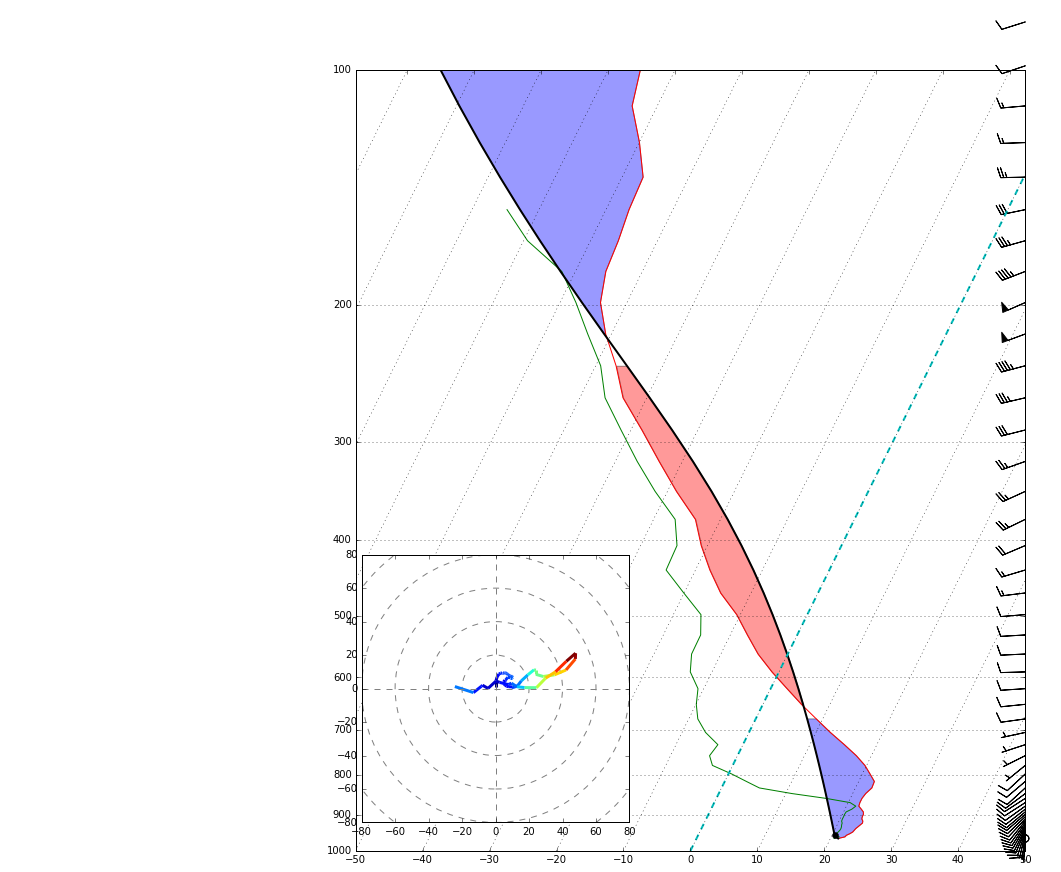

In [13]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 14)

# Create a skewT plot
skew = SkewT()

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, t, 'r')
skew.plot(p, td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], t[0], td[0])
lcl_temp = dry_lapse(concatenate((p[0], l)), t[0])[-1].to('degC')
skew.plot(l, lcl_temp, 'ko', markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = parcel_profile(p, t[0], td[0]).to('degC')
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, t, prof, where=t>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, t, prof, where=t<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0 isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Draw hodograph
ax_hod = inset_axes(skew.ax, '40%', '40%', loc=3)
h = Hodograph(ax_hod, component_range=80.)
h.add_grid(increment=20)
h.plot_colormapped(u, v, spd)

# Show the plot
plt.show()

